In [15]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

import warnings
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [3]:
df = pd.read_excel('../data/total_full_month.xlsx')
df['DT'] = pd.to_datetime(df['DT'])
df = df.set_index('DT')
df

,cnt
DT,
2020-01-01,3483
2020-01-02,3270
2020-01-03,5583
2020-01-04,5570
2020-01-05,3707
...,...
2022-10-27,2301
2022-10-28,2426
2022-10-29,1872


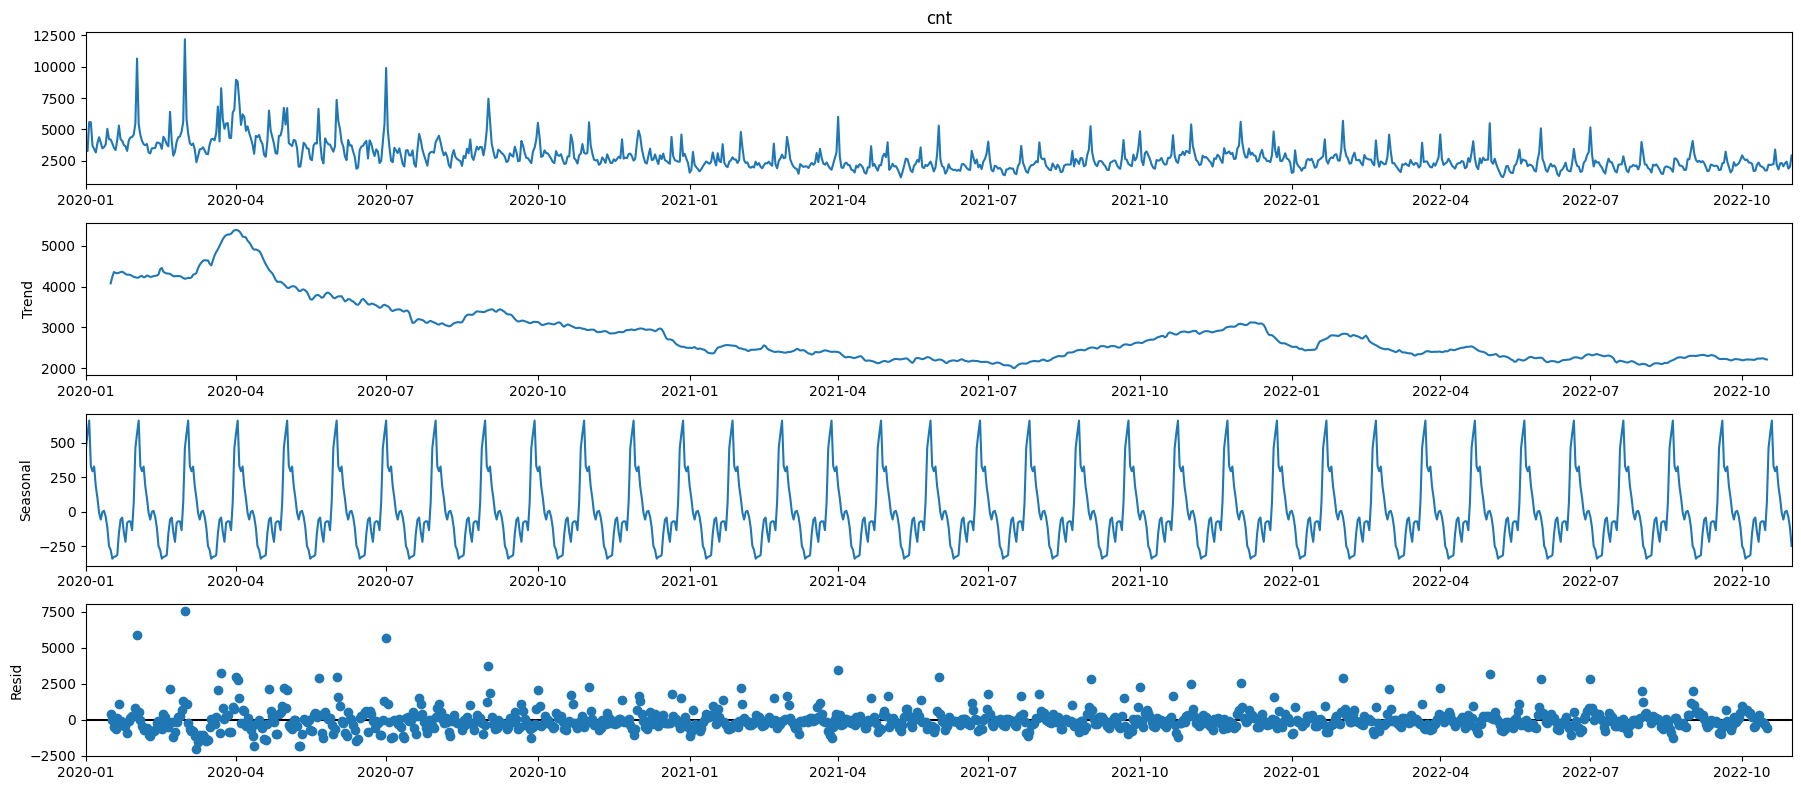

In [4]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df['cnt'], model='additive', period = 30)
fig = decomposition.plot()
plt.show()

В данных есть явная сезонность, можно использовать SARIMAX

In [5]:
y = df['cnt'].copy()
y = y.resample('MS').sum()
y

DT
2020-01-01    126911
2020-02-01    123950
2020-03-01    146280
2020-04-01    146322
2020-05-01    115444
2020-06-01    108861
2020-07-01    103692
2020-08-01     98464
2020-09-01     98814
2020-10-01     95529
2020-11-01     86095
2020-12-01     90504
2021-01-01     73520
2021-02-01     69367
2021-03-01     73845
2021-04-01     68627
2021-05-01     67441
2021-06-01     66746
2021-07-01     63520
2021-08-01     72591
2021-09-01     76394
2021-10-01     86788
2021-11-01     87145
2021-12-01     93652
2022-01-01     77157
2022-02-01     76183
2022-03-01     73290
2022-04-01     75018
2022-05-01     69134
2022-06-01     66082
2022-07-01     68846
2022-08-01     67569
2022-09-01     68336
2022-10-01     69392
Freq: MS, Name: cnt, dtype: int64

Переберем коэффициенты для выбора оптимальных

In [6]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
pdq, seasonal_pdq

([(0, 0, 0),
  (0, 0, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 0, 0),
  (1, 0, 1),
  (1, 1, 0),
  (1, 1, 1)],
 [(0, 0, 0, 12),
  (0, 0, 1, 12),
  (0, 1, 0, 12),
  (0, 1, 1, 12),
  (1, 0, 0, 12),
  (1, 0, 1, 12),
  (1, 1, 0, 12),
  (1, 1, 1, 12)])

In [7]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
            model = SARIMAX(y, order=param, seasonal_order=param_seasonal)
            model_fit = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_fit.aic))


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:873.9680818766233
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:862.3766647720256
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:524.1895433667296
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:498.65981141733505
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:833.3771659834763
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:842.5752436152928
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:497.53619621159817
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:500.64755496911164
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:849.8553727752517
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:849.6950719705878
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:518.7612836899627
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:495.49445221419785
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:848.7888256057339
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:850.6685973183698
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:498.9870740587302
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:497.48881411230076
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:696.0509814885752
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:694.9537166713956
ARIMA

Лучшее значение
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:447.78852328551636

In [8]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),)
model_fit = model.fit()

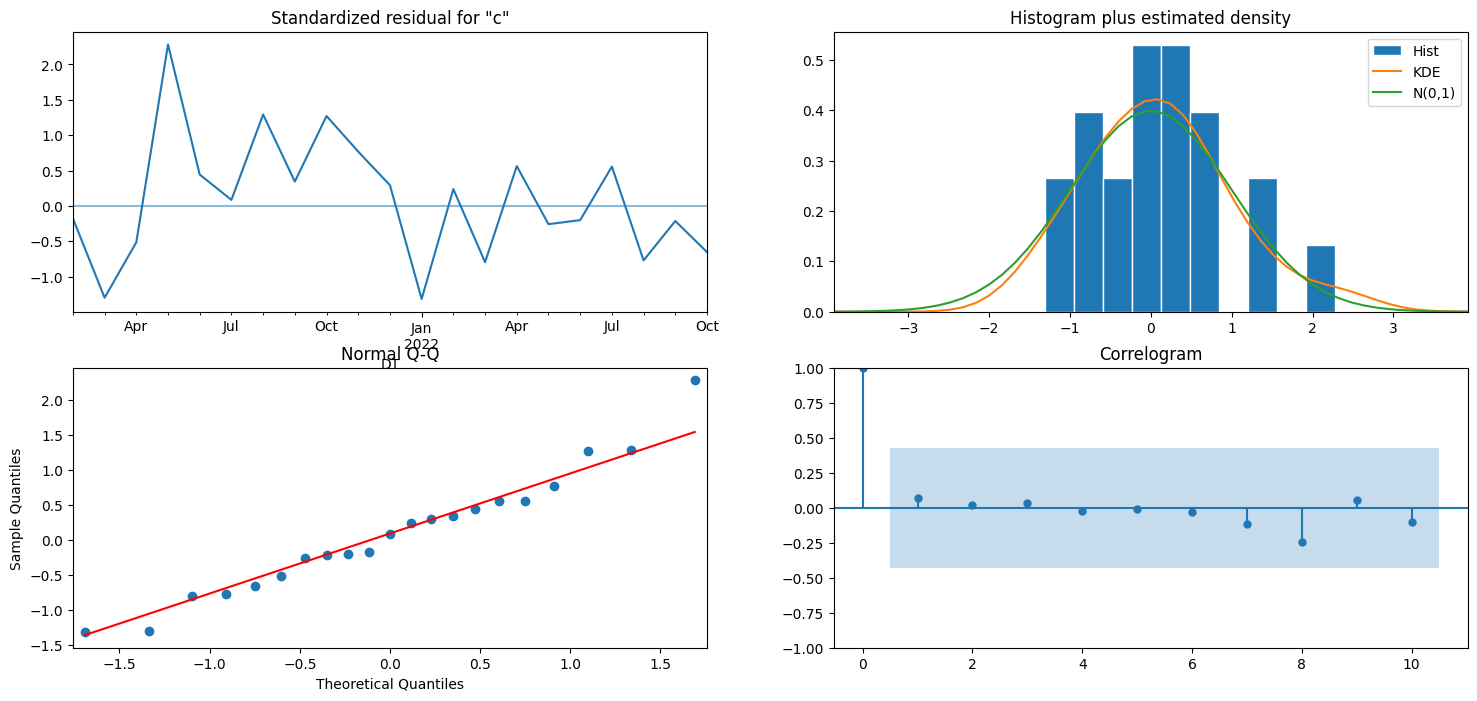

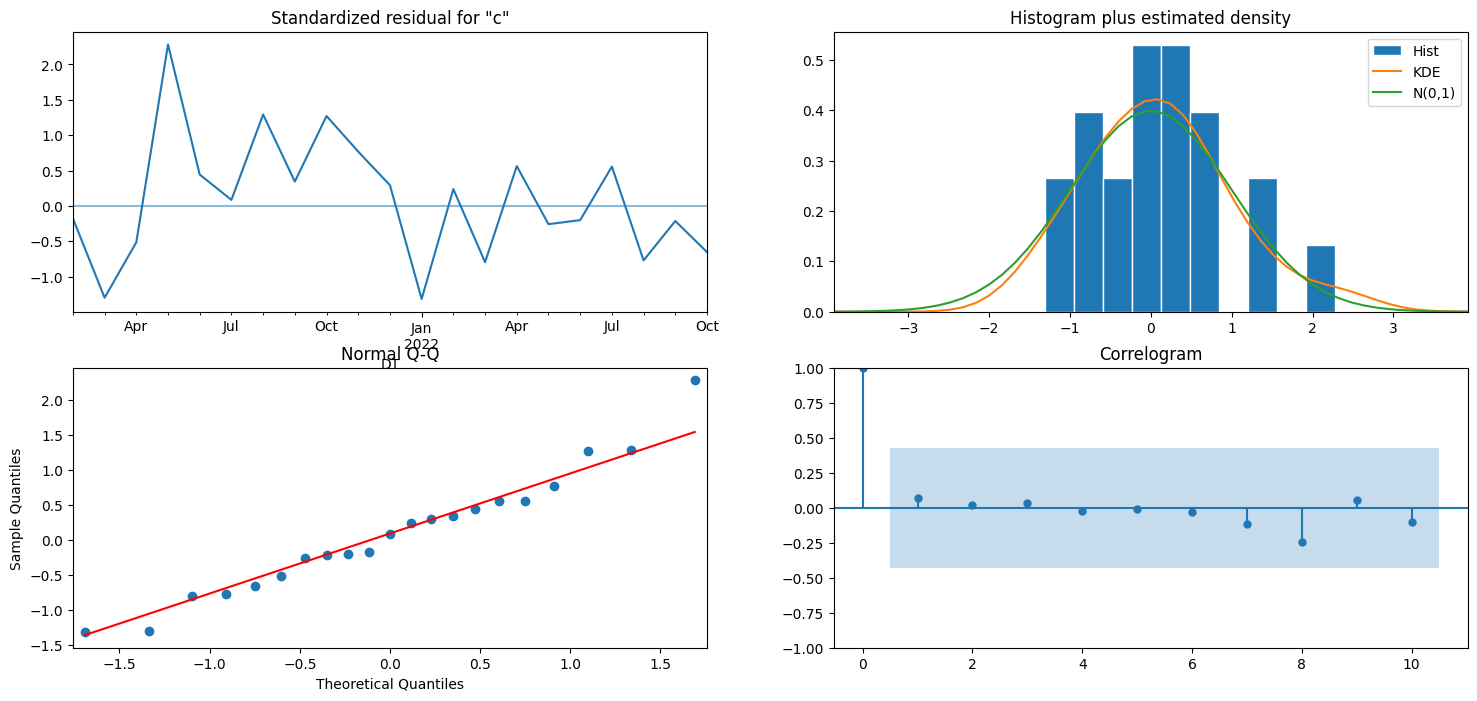

In [9]:
model_fit.plot_diagnostics()

In [10]:
prediction = model_fit.predict(len(y), len(y) + 11)

<AxesSubplot: xlabel='DT'>

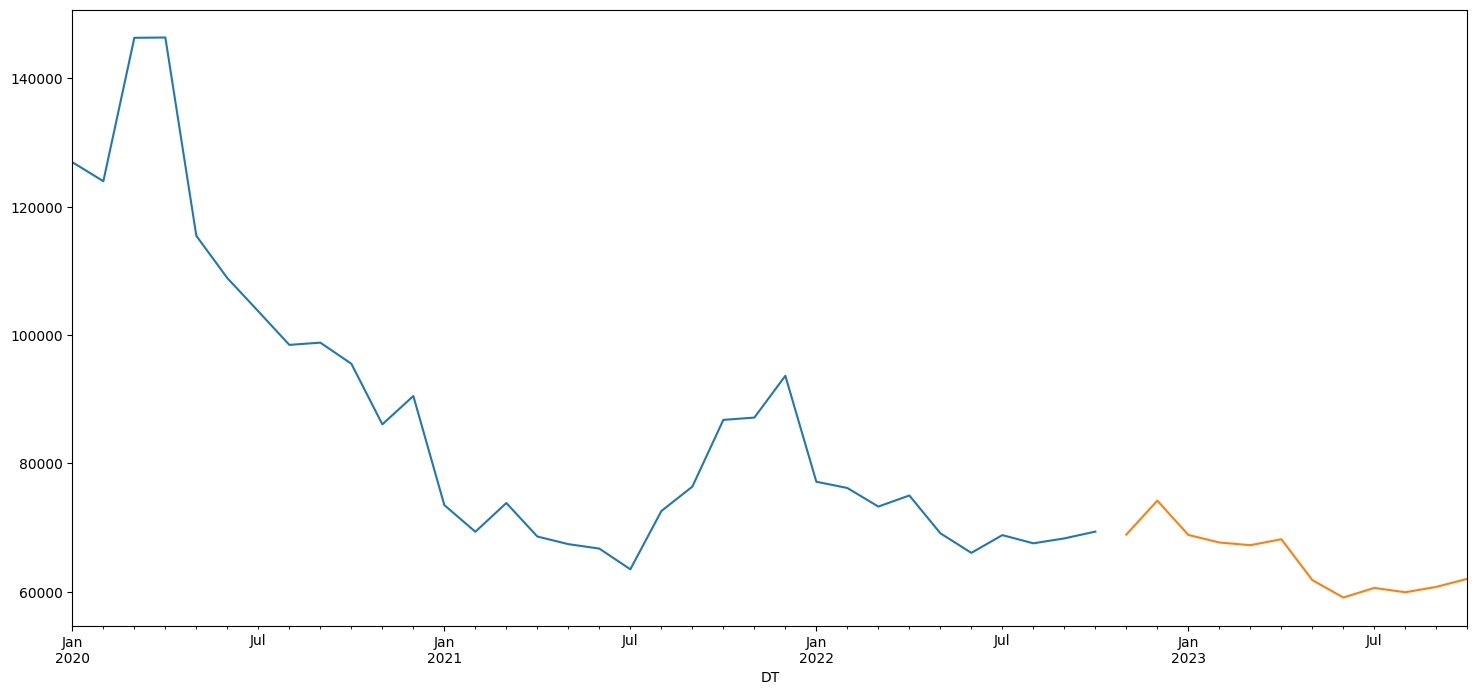

In [11]:
y.plot()
prediction.plot()

In [12]:
model_fit.save('arimax_model')

In [13]:
len(y)

34

In [16]:
loaded_model = SARIMAXResults.load('../models/arimax_model')

In [28]:
pr = loaded_model.predict(34, 48)
pr = dict(zip(pr.index.format() , pr))
pr

{'2022-11-01': 68933.69604416855,
 '2022-12-01': 74211.85705457082,
 '2023-01-01': 68873.74675084211,
 '2023-02-01': 67695.50268113821,
 '2023-03-01': 67277.12947867576,
 '2023-04-01': 68208.48304619883,
 '2023-05-01': 61839.71384031169,
 '2023-06-01': 59129.485022221095,
 '2023-07-01': 60624.0375162512,
 '2023-08-01': 59949.28819972218,
 '2023-09-01': 60786.455962329856,
 '2023-10-01': 62039.57674113446,
 '2023-11-01': 61127.15710346149,
 '2023-12-01': 65720.867791204,
 '2024-01-01': 66597.02706805893}